# Credit Card Fraud Detection - Comprehensive Evaluation Using Appropriate Metrics

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import json

## Class Imbalance Handling Strategies

4 different strategies:<br>
1. Original Class Distribution
2. SMOTE
3. Borderline SMOTE
4. Combination of SMOTE and Undersampling

were used to handle class imbalance.
Following are the barplots for class distribution from each strategy.

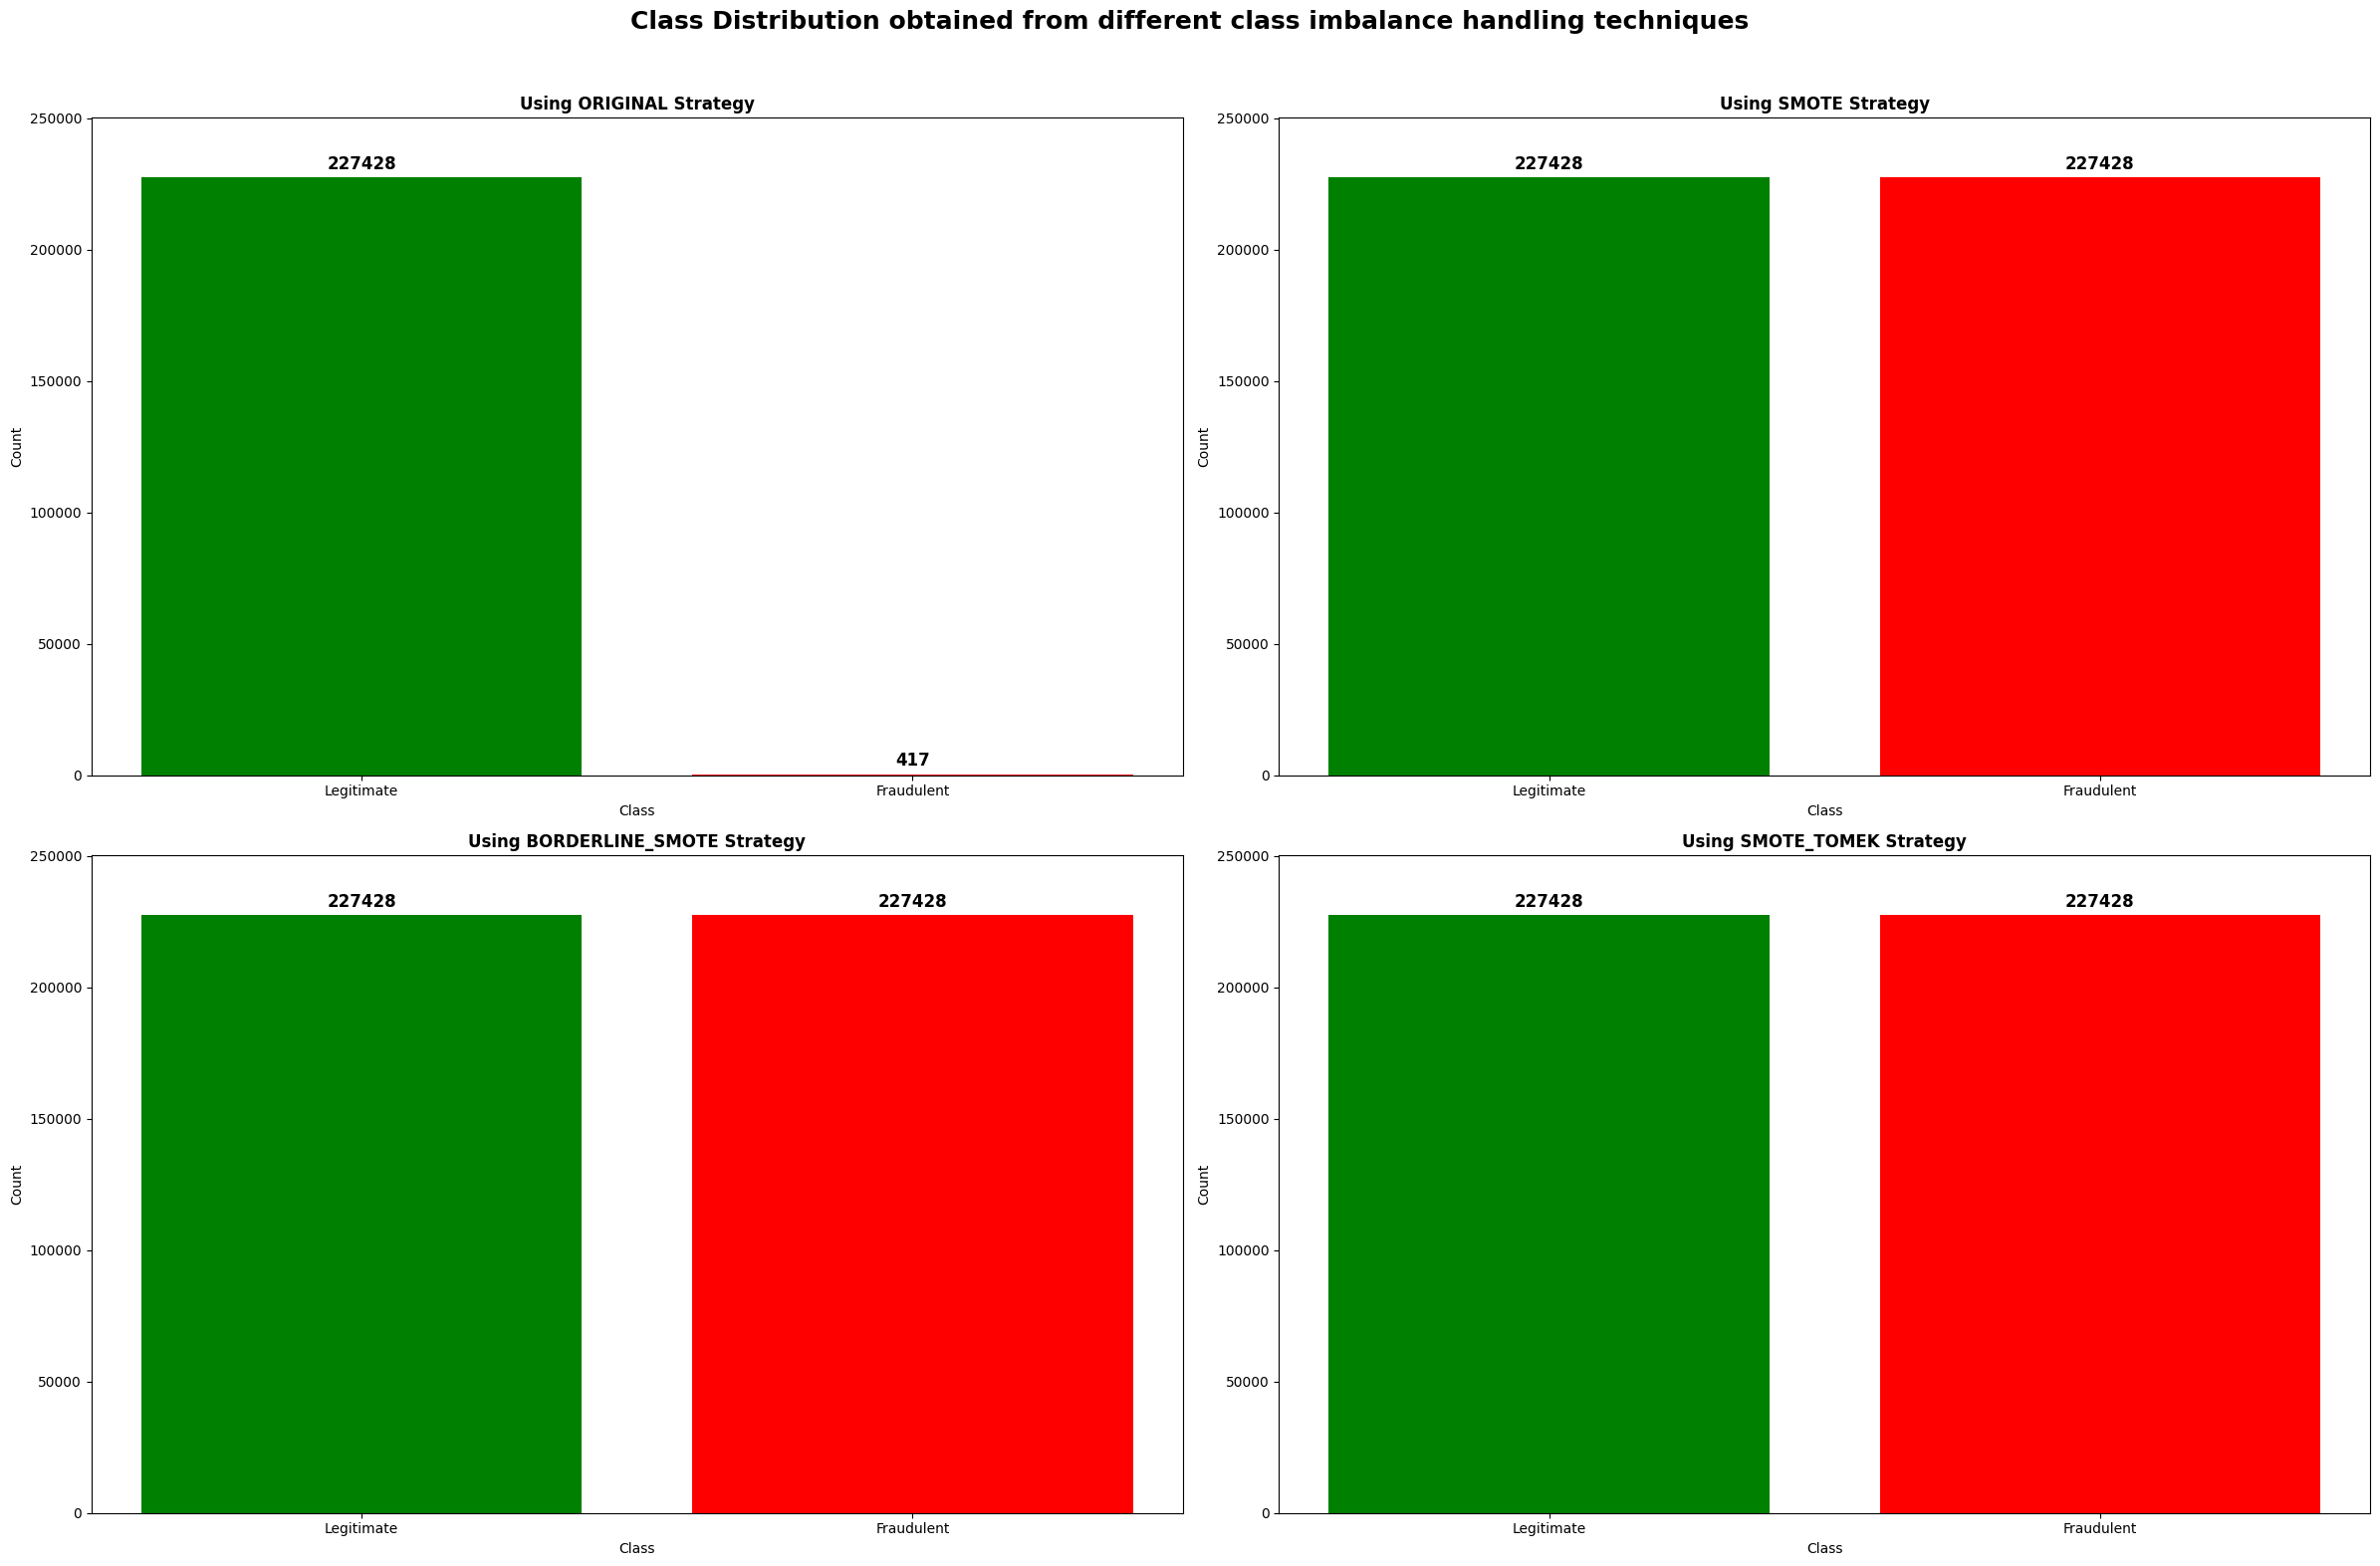

In [61]:
# Load the JSON file
with open('../data/imbalance_handling_strategies.json', 'r') as f:
    imbalance_handling_strategies = json.load(f)

# Convert to DataFrame
imbalance_handling_strategies_df = (pd.DataFrame(imbalance_handling_strategies)).T

# display(imbalance_handling_strategies_df)

# Plot barplots
strategies = imbalance_handling_strategies_df.index.tolist()
# display(strategies)
# Plot barplots for each strategy's class distribution
fig, axes0 = plt.subplots(2, 2, figsize=(24, 16))
axes0 = axes0.flatten()

for i, strategy in enumerate(strategies):
    counts = imbalance_handling_strategies_df.loc[strategy]
    bars = axes0[i].bar(counts.index, counts.values, color=['green', 'red'])
    axes0[i].set_title(f"Using {strategy.upper()} Strategy", fontweight='bold')
    axes0[i].set_ylabel("Count")
    axes0[i].set_xlabel("Class")
    axes0[i].set_ylim(0, max(imbalance_handling_strategies_df.max()) * 1.1)
    # Add count labels on top of bars
    for bar in bars:
        height = bar.get_height()
        axes0[i].annotate(f'{int(height)}',
                          xy=(bar.get_x() + bar.get_width() / 2, height),
                          xytext=(0, 3),  # 3 points vertical offset
                          textcoords="offset points",
                          ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.suptitle("Class Distribution obtained from different class imbalance handling techniques",fontsize=18, fontweight='bold')
plt.tight_layout(rect = [0, 0, 1, 0.96])
plt.show()


## Model Training and Selection based on results from Cross Validation
Three different models:
1. Logistic Regression
2. Decision Trees
3. Random Forests

were trained using Cross Validation for each of the strategies.
Following is the visualization of results from each strategy and from each model.

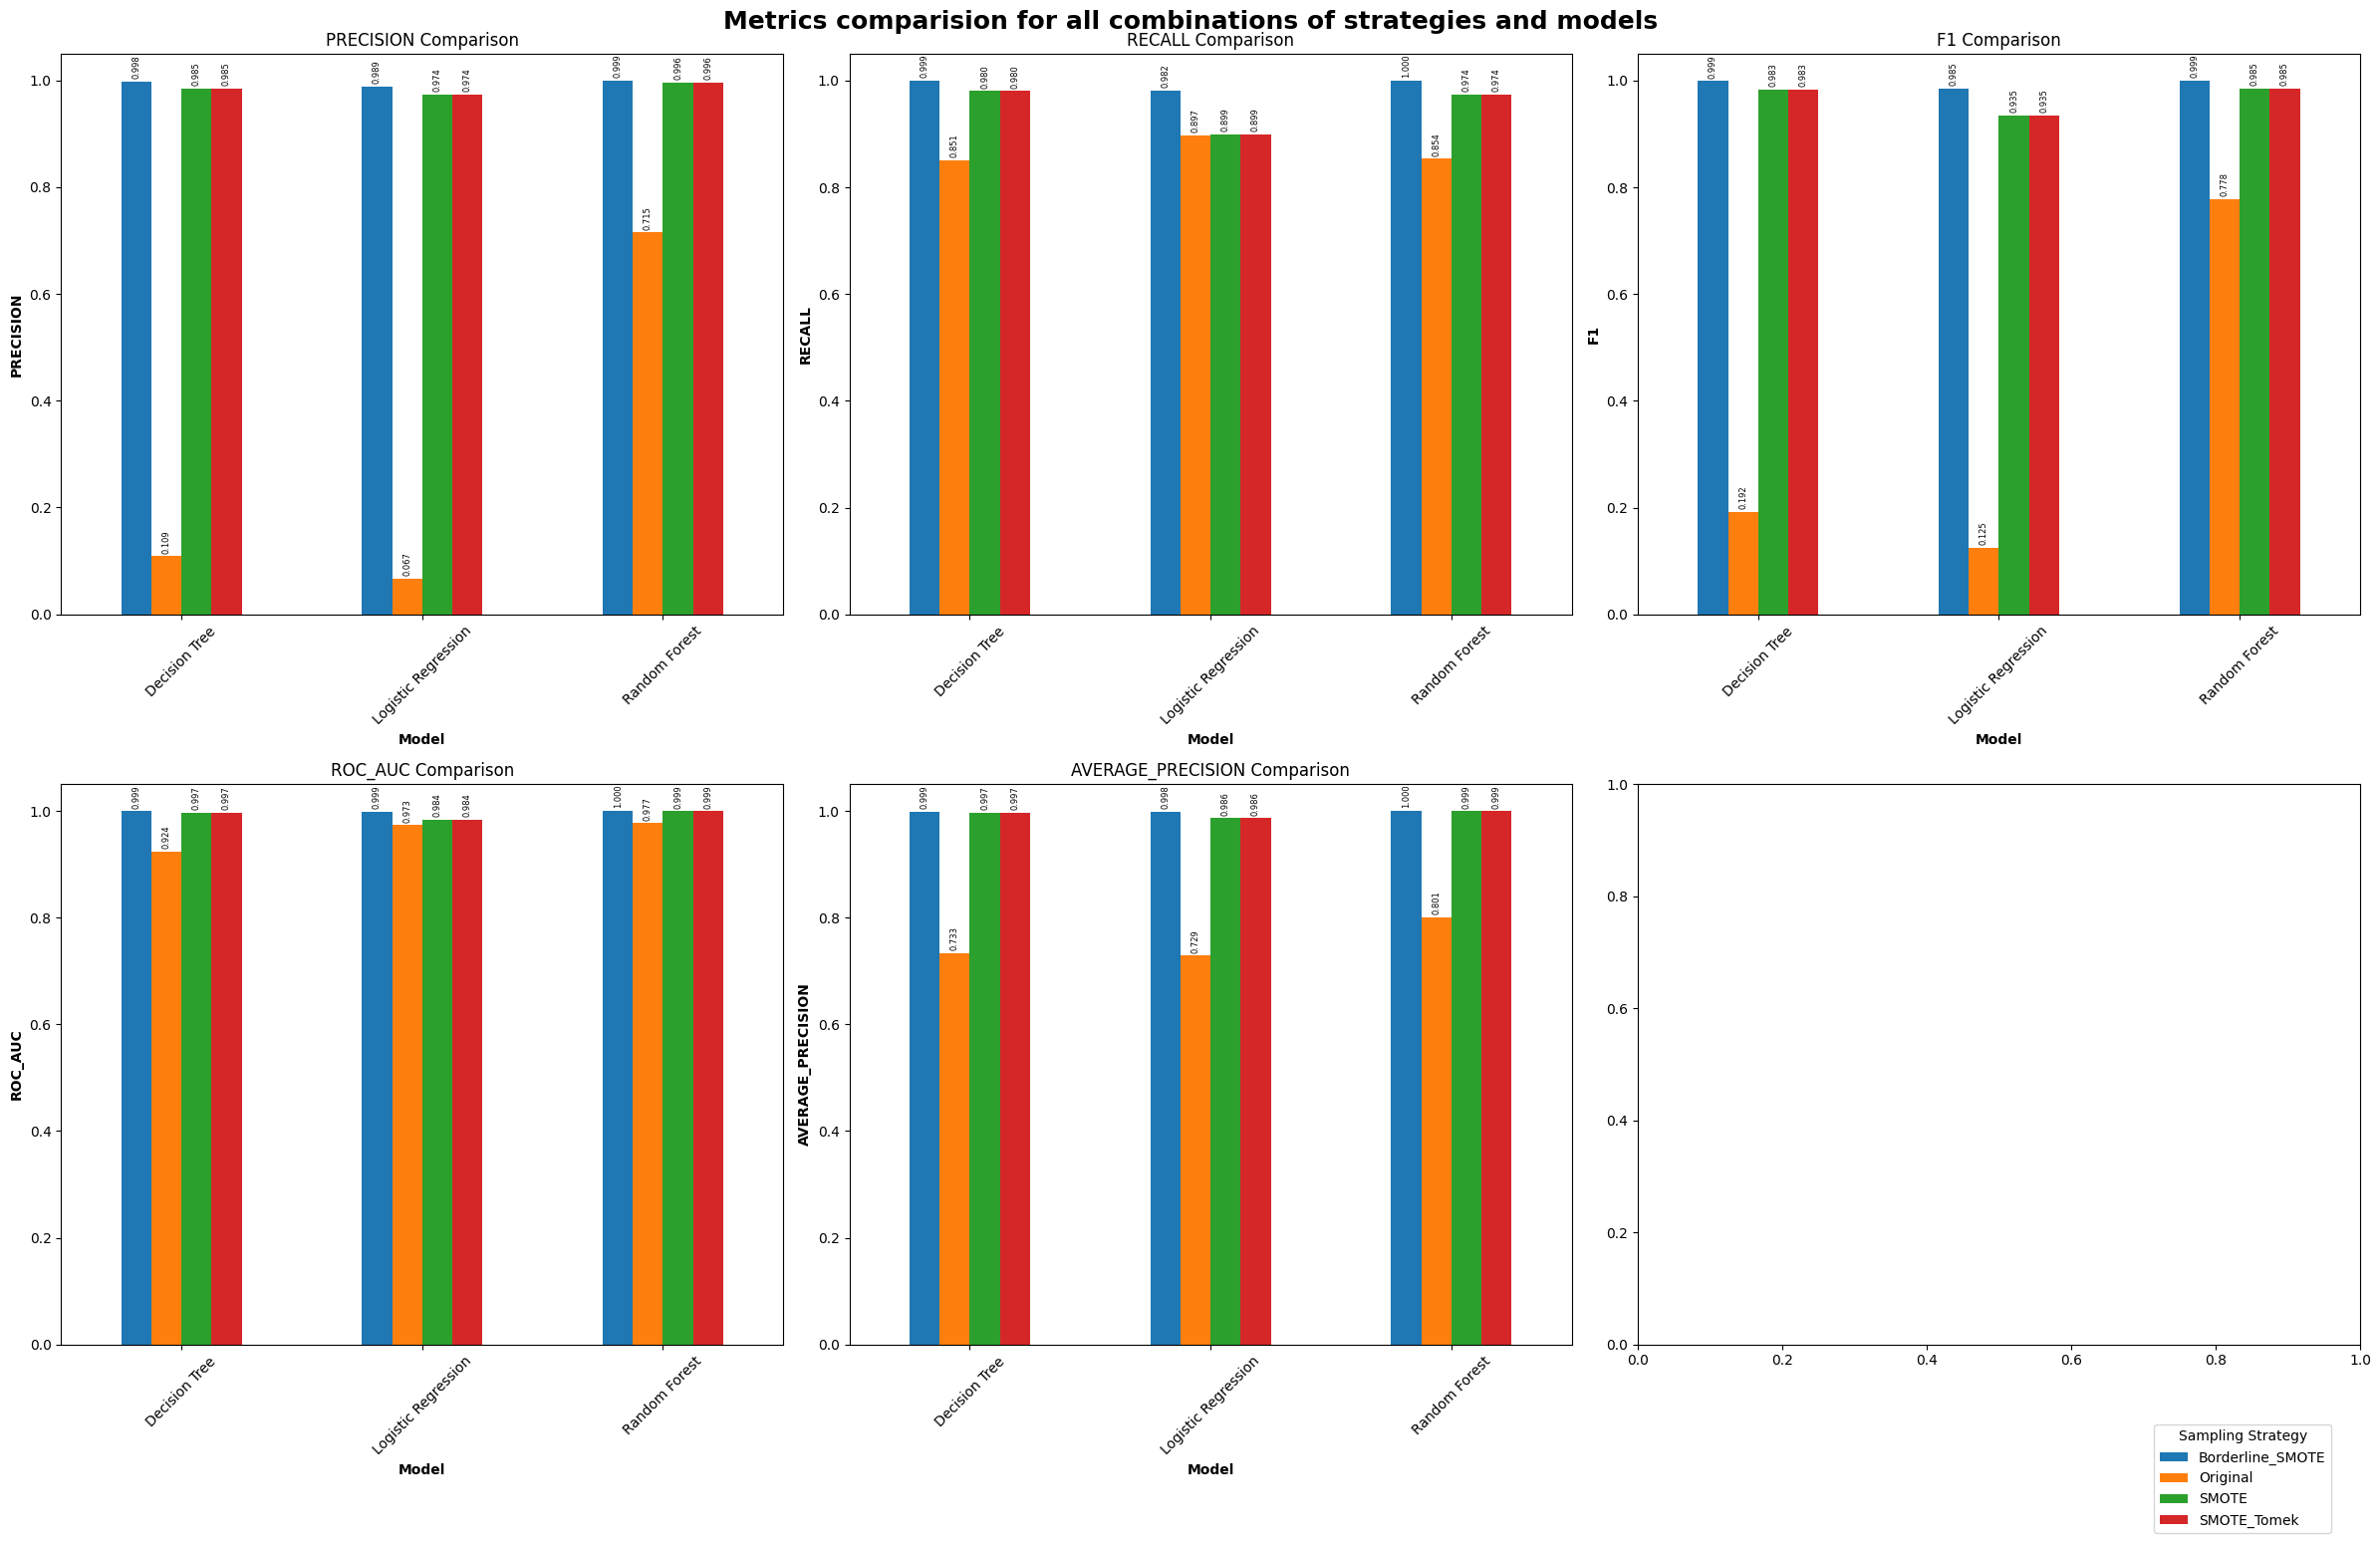

In [73]:
# Load the JSON file
with open('../performance-measures/cv_metrics_data.json', 'r') as f:
    results_comparision = json.load(f)

# display(comparision)

# Create a dataframe to visualize the results
results_df = []
for strategy in results_comparision:
    for model in results_comparision[strategy]:
        for metric in results_comparision[strategy][model]:
            results_df.append(
                {
                    'Strategy': strategy,
                    'Model': model,
                    'Metric': metric,
                    'Score': results_comparision[strategy][model][metric]['mean'],
                    'Std': results_comparision[strategy][model][metric]['std']
                }
            )
results_df = pd.DataFrame(results_df)
# display(results_df)

fig, axes1 = plt.subplots(2, 3, figsize=(24, 16))

metrics_to_plot = ['precision', 'recall', 'f1', 'roc_auc', 'average_precision']

for i, metric in enumerate(metrics_to_plot):
    pivot_data = results_df[results_df['Metric'] == metric].pivot(
        index='Model', columns='Strategy', values='Score'
    )
    ax = axes1[i // 3, i % 3]
    bars = pivot_data.plot(kind='bar', ax=ax, title=f"{metric.upper()} Comparison", legend=False)
    ax.set_xlabel("Model", fontweight="bold")
    ax.set_ylabel(metric.upper(), fontweight="bold")
    ax.tick_params(axis='x', rotation=45)
    # Add value labels on top of each bar
    for container in bars.containers:
        bars.bar_label(container, fmt='%.3f', fontsize=6,rotation=90, label_type='edge', padding=2)


handles, labels = axes1[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, title="Sampling Strategy", loc='lower right', bbox_to_anchor=(0.98, 0.02))
plt.suptitle("Metrics comparision for all combinations of strategies and models",fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

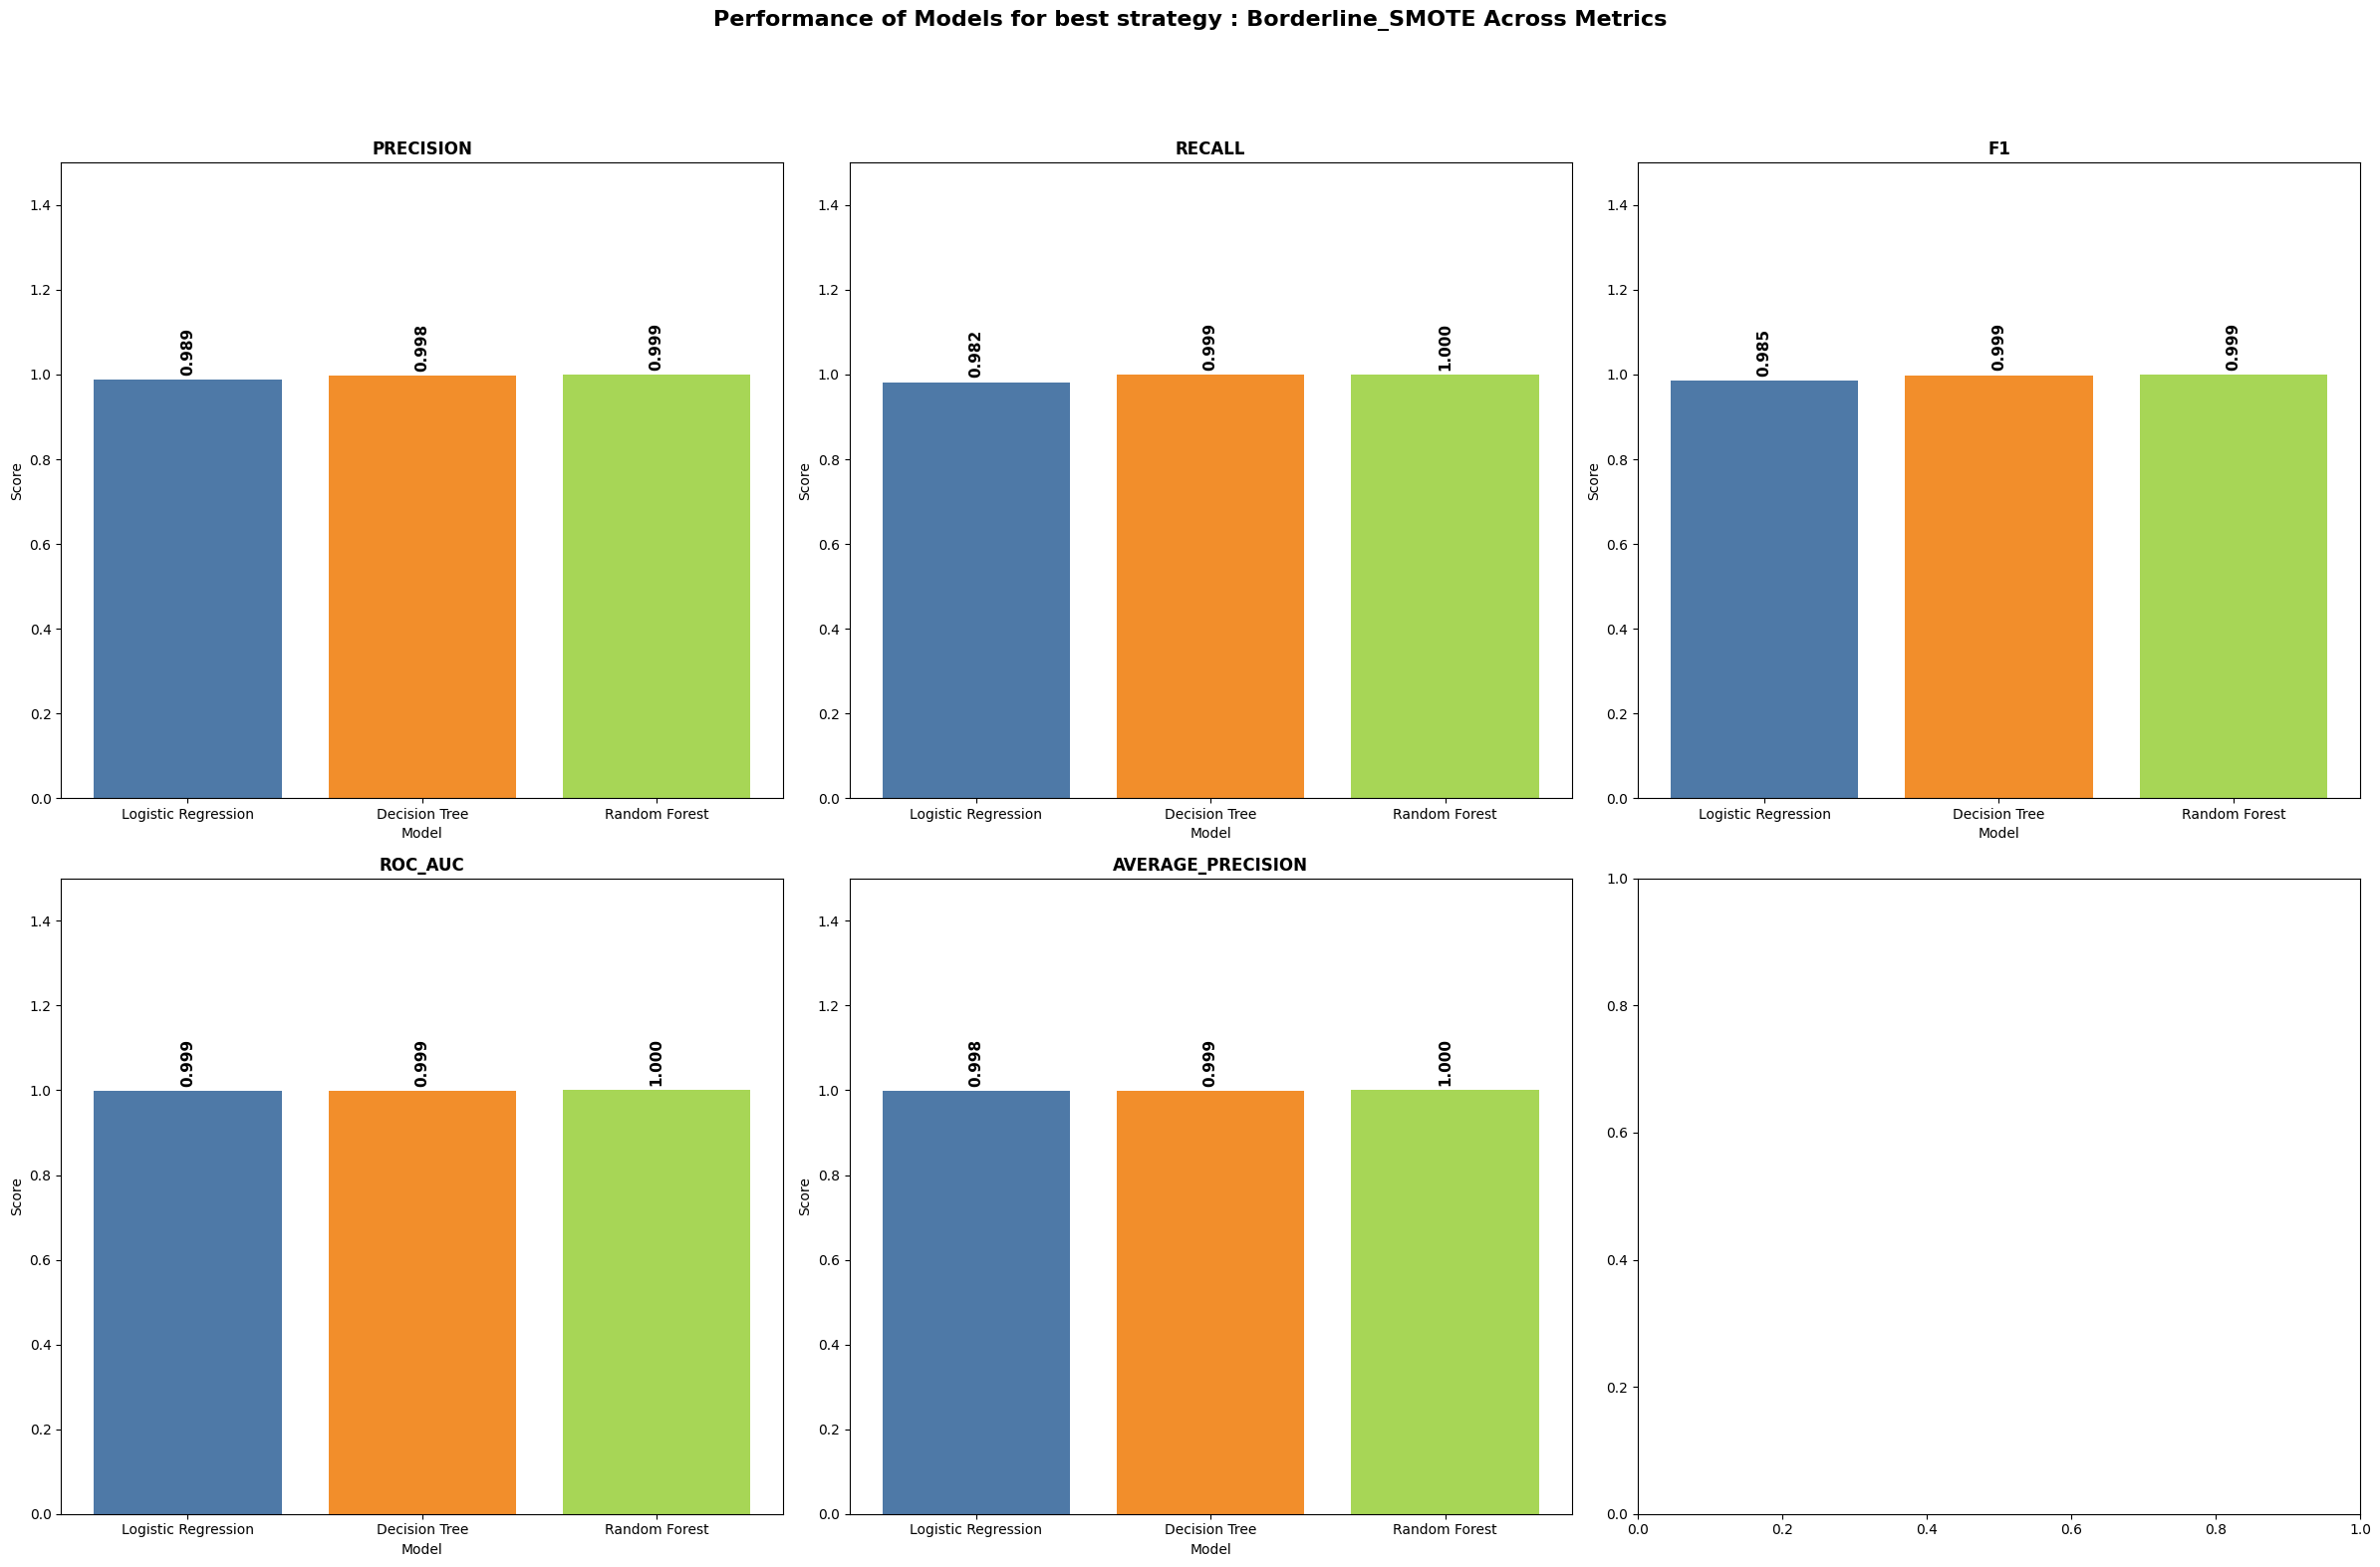

In [85]:
# plotting for best strategy and best 2 models

# best strategy based on F1-Score
f1_results = results_df[results_df['Metric']=='f1'].pivot(index = 'Model', columns = 'Strategy', values = 'Score')
f1_results = f1_results.round(4)
# extract best strategy and 2 models
best_strategy = f1_results.mean().idxmax()
best_models = f1_results[best_strategy].nlargest(3).index.tolist()

# Plot metrics for only these two
# Filter the results for the best strategy and top 2 models
filtered_df = results_df[
    (results_df['Strategy'] == best_strategy) &
    (results_df['Model'].isin(best_models)) &
    (results_df['Metric'].isin(metrics_to_plot))
]

fig, axes2 = plt.subplots(2, 3, figsize=(24, 16))

for i, metric in enumerate(metrics_to_plot):
    data = filtered_df[filtered_df['Metric'] == metric]
    bars = axes2[i//3,i%3].bar(data['Model'], data['Score'], color=['#4e79a7', '#f28e2b','#a7d656'])
    axes2[i//3,i%3].set_title(f"{metric.upper()}", fontweight='bold')
    axes2[i//3,i%3].set_ylim(0, 1)
    axes2[i//3,i%3].set_ylabel('Score')
    axes2[i//3,i%3].set_xlabel('Model')
    axes2[i//3,i%3].set_ylim(0, 1.5)
    # Add value labels vertically
    for bar in bars:
        height = bar.get_height()
        axes2[i//3,i%3].annotate(f'{height:.3f}',
                         xy=(bar.get_x() + bar.get_width() / 2, height),
                         xytext=(0, 3),
                         textcoords="offset points",
                         ha='center', va='bottom', fontsize=11, fontweight='bold', rotation=90)

plt.suptitle(f"Performance of Models for best strategy : {best_strategy} Across Metrics", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()
